In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lib.estimate import *
from nonlinear_system.vehicle_models import UnicycleModel

In [2]:
data = np.genfromtxt('data/x_p_y_p_theta.txt', skip_header=1)

V_MAX = 2
OMEGA_MAX = 2

Fs = 100
dt = 1/Fs

t = np.arange(data.shape[0])*dt

x_p = data[:, 0]
y_p = data[:, 1]
theta = data[:, 2]

# Upper bound for derivatives of measurements
x_p_max = [0, 1, 20]
y_p_max = [0, 1, 20]

# Noise Magnitude of measurement
Noise_Mag = 0

## Polyomial Estimator

In [3]:
x_p_hat, x_p_bound = get_poly_estimates(t, x_p, 1, 1, x_p_max, 20, delay=1, E=Noise_Mag)
y_p_hat, y_p_bound = get_poly_estimates(t, y_p, 1, 1, y_p_max, 20, delay=1, E=Noise_Mag)

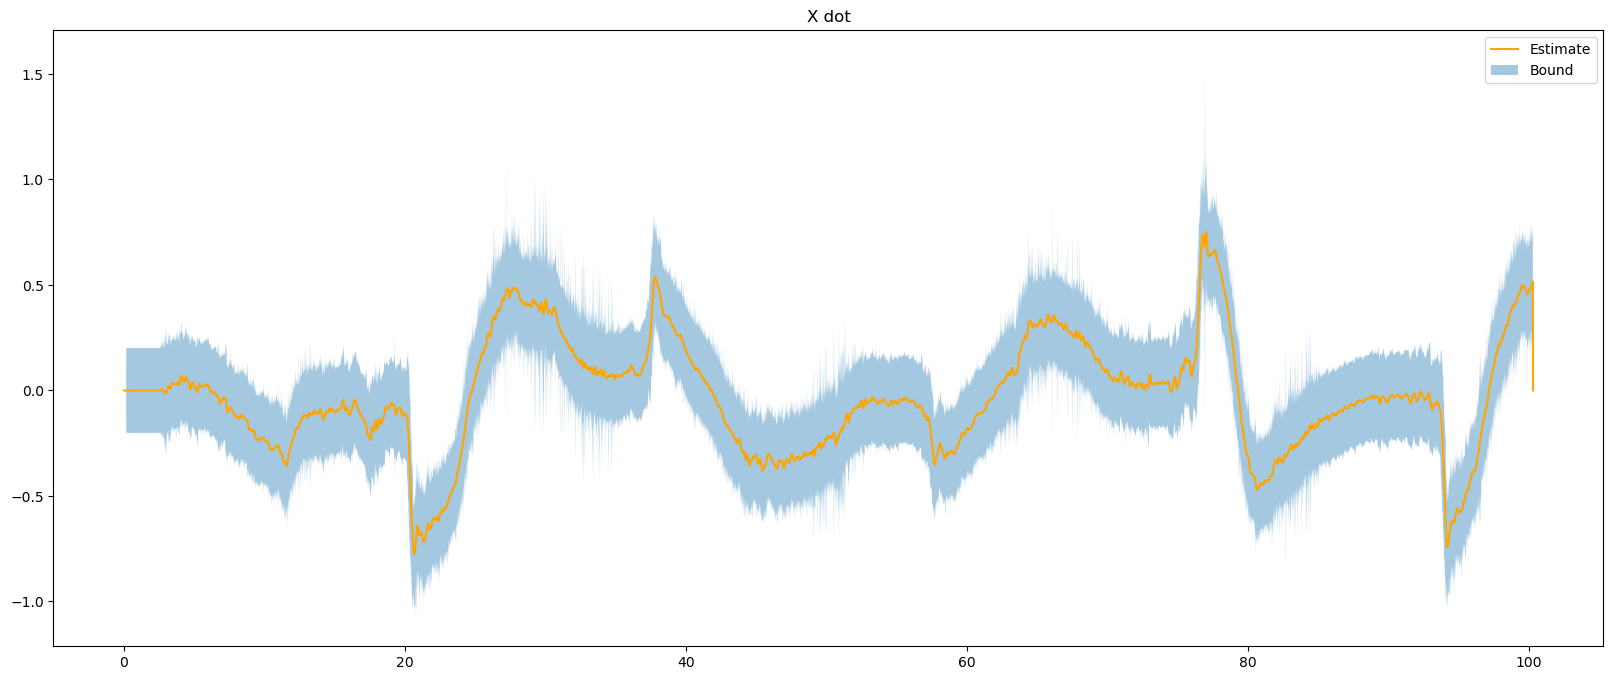

In [4]:
plt.figure(figsize=(20,8))
plt.plot(t, x_p_hat[1], color='orange', label="Estimate")
plt.fill_between(t, x_p_hat[1]-x_p_bound[1], x_p_hat[1]+x_p_bound[1], alpha=0.4, label="Bound")
plt.title("X dot")
plt.legend()
plt.show()

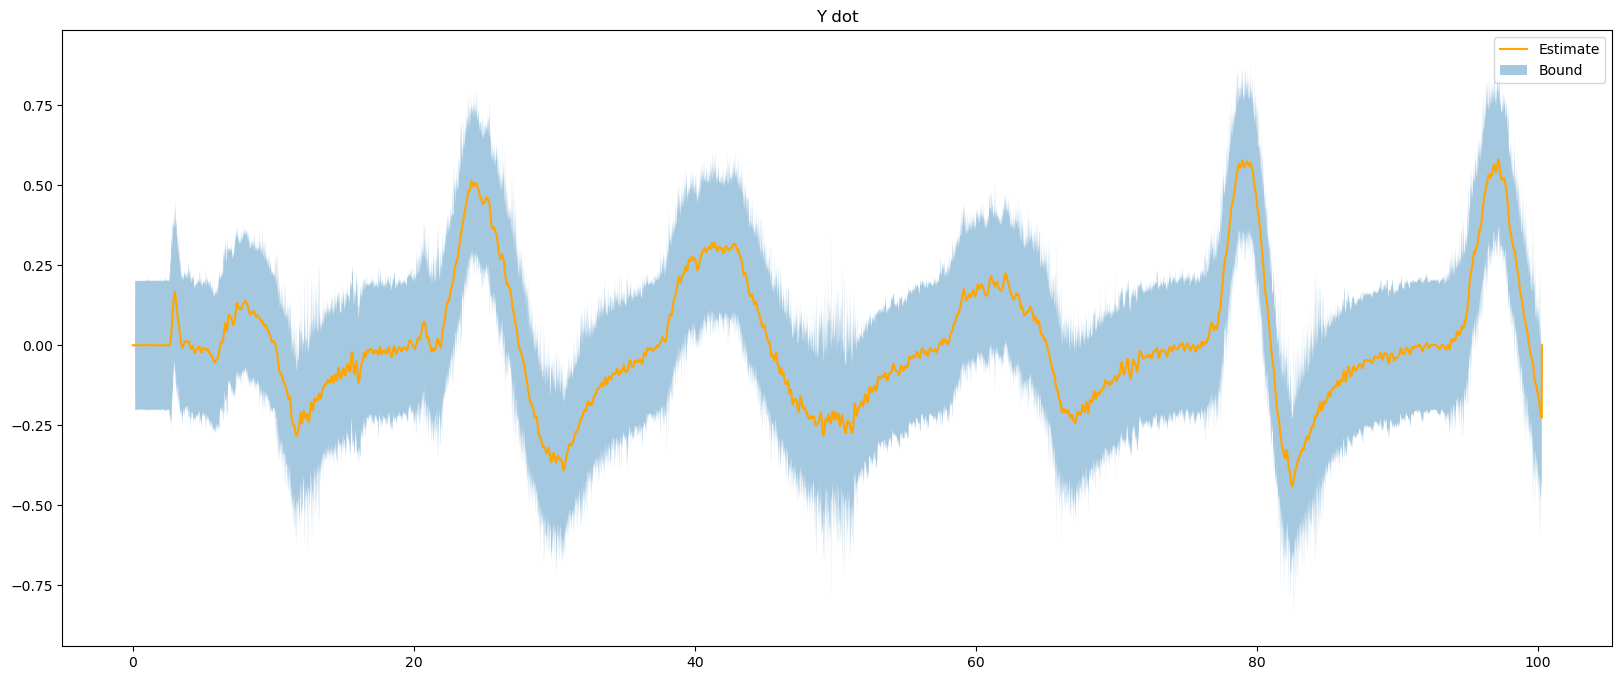

In [5]:
plt.figure(figsize=(20,8))
plt.plot(t, y_p_hat[1], color='orange', label="Estimate")
plt.fill_between(t, y_p_hat[1]-y_p_bound[1], y_p_hat[1]+y_p_bound[1], alpha=0.4, label="Bound")
plt.title("Y dot")
plt.legend()
plt.show()

In [6]:
model = UnicycleModel()

state_hat, state_low, state_high = model.invert_outputs(x_p_hat, y_p_hat, x_p_bound, y_p_bound)

theta_hat = state_hat[2]
theta_low = state_low[2]
theta_high = state_high[2]


In [ ]:
# Unwrap the angle for better visualisation

lim = -1.8
theta[theta<lim] += 2*np.pi 
theta_low[theta_hat<lim] += 2*np.pi 
theta_high[theta_hat<lim] += 2*np.pi 
theta_hat[theta_hat<lim] += 2*np.pi 

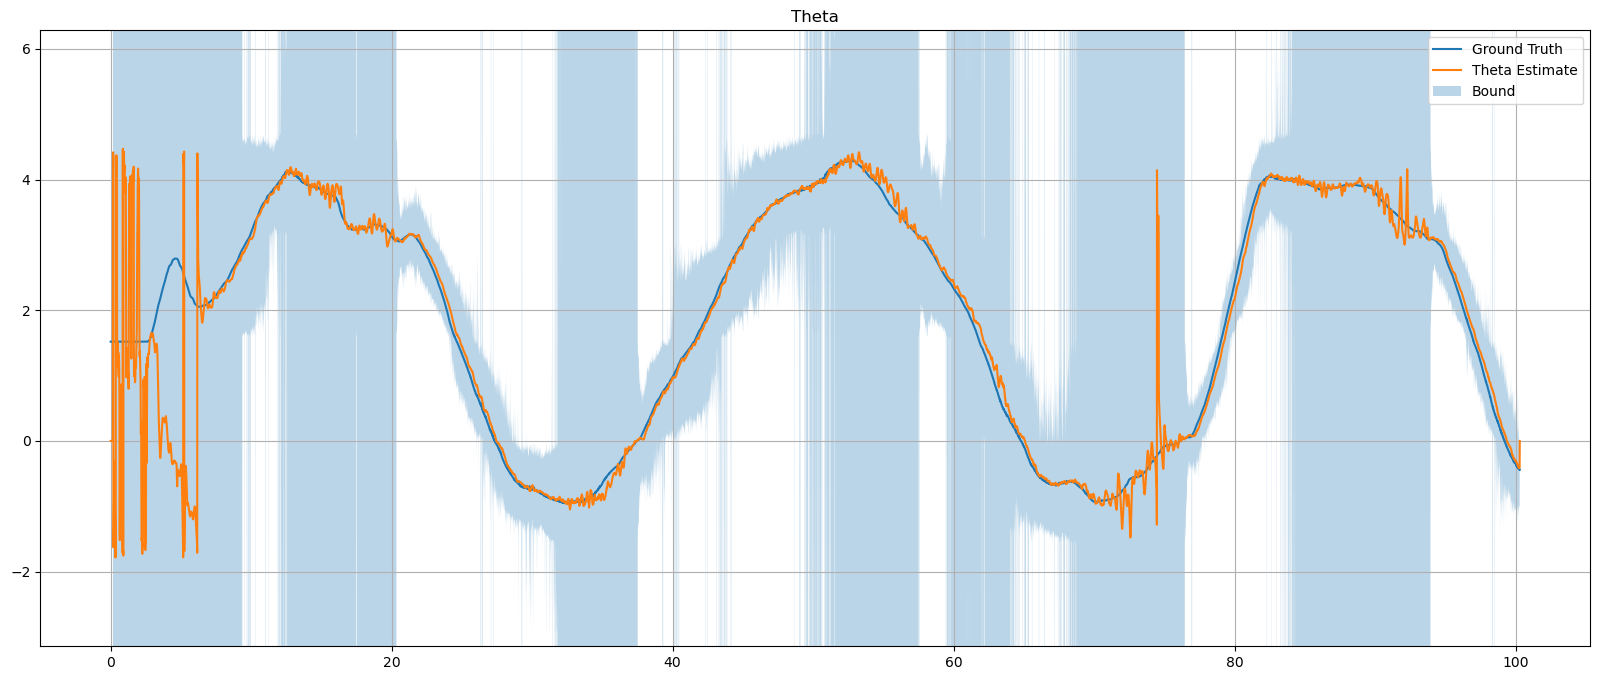

In [8]:
plt.figure(figsize=(20,8))
plt.plot(t, theta, label="Ground Truth")
plt.plot(t, theta_hat, label="Theta Estimate")
plt.fill_between(t, theta_low, theta_high, alpha=0.3, label="Bound")
plt.ylim([-np.pi, 2*np.pi])
plt.title("Theta")
plt.grid()
plt.legend()
plt.show()

## Gaussian Estimator

In [9]:
x_g_hat, x_g_bound = get_gauss_estimates(t, x_p, 1, 3, x_p_max, 20, delay=1, sigma=2, reg=0)
y_g_hat, y_g_bound = get_gauss_estimates(t, y_p, 1, 3, y_p_max, 20, delay=1, sigma=2, reg=0)

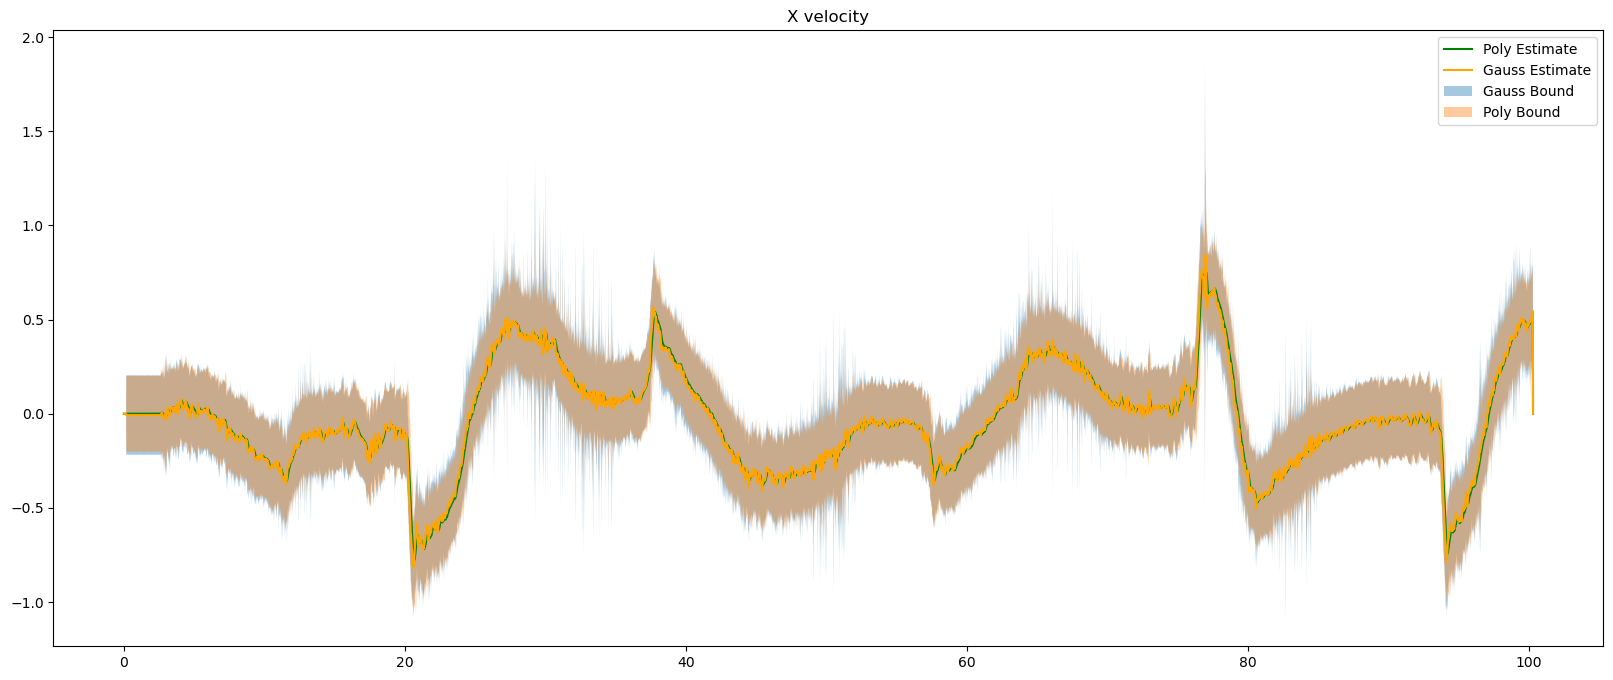

In [10]:
plt.figure(figsize=(20,8))
plt.plot(t, x_p_hat[1], color='green', label="Poly Estimate")
plt.plot(t, x_g_hat[1], color='orange', label="Gauss Estimate")
plt.fill_between(t, x_g_hat[1]-x_g_bound[1], x_g_hat[1]+x_g_bound[1], alpha=0.4, label="Gauss Bound")
plt.fill_between(t, x_p_hat[1]-x_p_bound[1], x_p_hat[1]+x_p_bound[1], alpha=0.4, label="Poly Bound")

plt.title("X velocity")
plt.legend()
plt.show()